In [ ]:
# Decision Tree
# Random Forest - 
# 1. Bagging 
# 2. Boosting 

# 1. Bagging - Multiple TREES
# It takes columns randomly  to form trees! 

# F1, F2, F3, F4, F5 - Input features 
# These combinations are totally random

# C1 -- [F1, F2, F3, F4]  -- Tree1 
# C2 -- [F2, F3, F4, F5]  -- Tree2 

# C3 -- [F3, F4]          -- Tree3 
# C4 -- [F5, F1]          -- Tree4
# -----------------------------------
# Evaluation 
# T (90)
# Good Trees T(50)
# ------------------------------------
# Ensemble 
# (*) Majority Voting 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
dataset = load_iris()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df["target"]  = dataset.target

In [ ]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
2,4.7,3.2,1.3,0.2,0
78,6.0,2.9,4.5,1.5,1
81,5.5,2.4,3.7,1.0,1
92,5.8,2.6,4.0,1.2,1
141,6.9,3.1,5.1,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:4], df["target"], test_size = 0.1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((135, 4), (15, 4), (135,), (15,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DecisionTreeClassifier()
# feature_importance_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# rfc = RandomForestClassifier()
# n_estimators - Is the number of trees with random columns to be made 
# 

In [ ]:
from multiprocessing import cpu_count
cpu_count()

2

In [ ]:
# random state
train_test_split([1,2,3,4,5,6,7,8,9,0], test_size= 0.2, random_state=np.random.RandomState(42))

[[6, 1, 8, 3, 0, 5, 4, 7], [9, 2]]

In [ ]:
rfc = RandomForestClassifier(n_estimators=20)

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc.score(x_test, y_test)
# x_test -> Model -> y_pred 
# compare y_test Vs y_pred 
# accuracy

1.0

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, y_pred) 

1.0

In [ ]:
y_test.tolist()

[0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1]

In [ ]:
confusion_matrix(y_test, y_pred)

array([[7, 0, 0],
       [0, 5, 0],
       [0, 0, 3]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
pd.DataFrame(rfc.feature_importances_, index=x_train.columns)

,0
sepal length (cm),0.098040
sepal width (cm),0.023021
petal length (cm),0.391577
petal width (cm),0.487362


In [ ]:
len(rfc.estimators_)

100

In [ ]:
from sklearn.tree import plot_tree

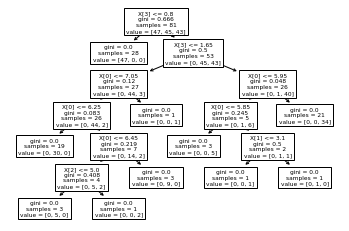

In [ ]:
plot_tree(rfc.estimators_[99])
plt.show()